In [1]:
import numpy as np 

X_train_c, X_test, Y_train_c, Y_test = np.load('./npy/classify_train.npy', allow_pickle=True)

print('X_train', X_train_c.shape)
print('X_test ', X_test.shape)
print('Y_train', Y_train_c.shape)
print('Y_test ', Y_test.shape)

X_train (10938, 128, 128, 1)
X_test  (1216, 128, 128, 1)
Y_train (10938, 1)
Y_test  (1216, 1)


In [2]:
from keras.models import Model, Sequential
from keras.layers import Input, Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization 
from keras.layers import concatenate, Conv2DTranspose, Reshape
from os import path

def whole_model():
    inputs = Input((128,128,1))
    depth = 16
    conv1 = Conv2D(int(depth*1), (3, 3), activation='relu', padding='same')(inputs)
    conv1 = BatchNormalization()(conv1)
    conv1 = Conv2D(int(depth*1), (3, 3), activation='relu', padding='same')(conv1)
    conv1 = BatchNormalization()(conv1)
    conv1 = Conv2D(int(depth*1), (3, 3), activation='relu', padding='same')(conv1)
    conv1 = BatchNormalization()(conv1)
    conv1 = Conv2D(int(depth*1), (3, 3), activation='relu', padding='same')(conv1)
    conv1 = BatchNormalization()(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
    pool1 = Dropout(0.25)(pool1)

    conv2 = Conv2D(int(depth*2), (3, 3), activation='relu', padding='same')(pool1)
    conv2 = BatchNormalization()(conv2)
    conv2 = Conv2D(int(depth*2), (3, 3), activation='relu', padding='same')(conv2)
    conv2 = BatchNormalization()(conv2)
    conv2 = Conv2D(int(depth*2), (3, 3), activation='relu', padding='same')(conv2)
    conv2 = BatchNormalization()(conv2)
    conv2 = Conv2D(int(depth*2), (3, 3), activation='relu', padding='same')(conv2)
    conv2 = BatchNormalization()(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
    pool2 = Dropout(0.25)(pool2)

    conv3 = Conv2D(int(depth*4), (3, 3), activation='relu', padding='same')(pool2)
    conv3 = BatchNormalization()(conv3)
    conv3 = Conv2D(int(depth*4), (3, 3), activation='relu', padding='same')(conv3)
    conv3 = BatchNormalization()(conv3)
    conv3 = Conv2D(int(depth*4), (3, 3), activation='relu', padding='same')(conv3)
    conv3 = BatchNormalization()(conv3)
    conv3 = Conv2D(int(depth*4), (3, 3), activation='relu', padding='same')(conv3)
    conv3 = BatchNormalization()(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
    pool3 = Dropout(0.25)(pool3)

    conv4 = Conv2D(int(depth*8), (3, 3), activation='relu', padding='same')(pool3)
    conv4 = BatchNormalization()(conv4)
    conv4 = Conv2D(int(depth*8), (3, 3), activation='relu', padding='same')(conv4)
    conv4 = BatchNormalization()(conv4)
    conv4 = Conv2D(int(depth*8), (3, 3), activation='relu', padding='same')(conv4)
    conv4 = BatchNormalization()(conv4)
    conv4 = Conv2D(int(depth*8), (3, 3), activation='relu', padding='same')(conv4)
    conv4 = BatchNormalization()(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(conv4)
    pool4 = Dropout(0.25)(pool4)

    conv5 = Conv2D(int(depth*16), (3, 3), activation='relu', padding='same')(pool4)
    conv5 = BatchNormalization()(conv5)
    conv5 = Conv2D(int(depth*16), (3, 3), activation='relu', padding='same')(conv5)
    conv5 = BatchNormalization()(conv5)
    conv5 = Conv2D(int(depth*16), (3, 3), activation='relu', padding='same')(conv5)
    conv5 = BatchNormalization()(conv5)
    conv5 = Conv2D(int(depth*16), (3, 3), activation='relu', padding='same')(conv5)
    conv5 = BatchNormalization()(conv5)
    pool5 = MaxPooling2D(pool_size=(2, 2))(conv5)
    pool5 = Dropout(0.25)(pool5)

    conv6 = Conv2D(int(depth*32), (3, 3), activation='relu', padding='same')(pool5)
    conv6 = BatchNormalization()(conv6)
    conv6 = Conv2D(int(depth*32), (3, 3), activation='relu', padding='same')(conv6)
    conv6 = BatchNormalization()(conv6)
    conv6 = Conv2D(int(depth*32), (3, 3), activation='relu', padding='same')(conv6)
    conv6 = BatchNormalization()(conv6)
    conv6 = Conv2D(int(depth*32), (3, 3), activation='relu', padding='same')(conv6)
    conv6 = BatchNormalization()(conv6)
    pool6 = MaxPooling2D(pool_size=(2, 2))(conv6)
    pool6 = Dropout(0.25)(pool6)
    
    c_conv_output = pool5 # 변경
    dense1 = Flatten()(c_conv_output)
    dense2 = Dense(int(depth*32), activation='relu')(dense1)
    dense2 = BatchNormalization()(dense2)
    
    c_outputs = Dense(2, activation='softmax')(dense2)
    c_model_ = Model(inputs=[inputs], outputs=[c_outputs], name='classify_model')

    return c_model_

Using TensorFlow backend.


In [3]:
c_model_ = whole_model()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.



In [4]:
from IPython.display import clear_output
from keras.callbacks import Callback
import matplotlib.pyplot as plt

class PlotLosses(Callback):
    def on_train_begin(self, logs={}):

        self.i = 0
        self.x = []
        self.losses = []
        self.val_losses = []
        
        self.x_ = []
        self.accuracy = []
        self.val_accuracy = []
        
        self.fig = plt.figure()

        self.logs = []

    def on_epoch_end(self, epoch, logs={}):

        self.logs.append(logs)
        self.x.append(self.i)
        self.losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))

        self.accuracy.append(logs.get('accuracy'))
        self.val_accuracy.append(logs.get('val_accuracy'))

        self.i += 1

        clear_output(wait=True)
        plt.figure(figsize=(15,5))
        plt.subplot(1,2,1)
        plt.plot(self.x, self.losses, label="loss")
        plt.plot(self.x, self.val_losses, label="val_loss")
        plt.legend()
        
        plt.subplot(1,2,2)
        plt.plot(self.x, self.accuracy, label="accuracy")
        plt.plot(self.x, self.val_accuracy, label="val_accuracy")
        plt.legend()
        plt.show()

        print("loss = ", self.losses[-1], ", val_loss = ", self.val_losses[-1])
        print("accuracy = ", self.accuracy[-1], ", val_accuracy = ", self.val_accuracy[-1])

    

In [5]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

# 학습 중에 loss 그리기
plot_losses = PlotLosses()

# overfitting이 발생하면 학습 중지
early_stopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=50)

# 학습 실행하면서 학습율 감소시키기
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.001)


In [6]:
from keras import optimizers
from keras.optimizers import Adam
from os import path

callbacks = [plot_losses, reduce_lr]
c_model_.summary()
c_model_.compile(optimizer=optimizers.Adadelta(), loss='sparse_categorical_crossentropy', metrics=["accuracy"])

Model: "classify_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 128, 128, 1)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 16)      160       
_________________________________________________________________
batch_normalization_1 (Batch (None, 128, 128, 16)      64        
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 128, 128, 16)      2320      
_________________________________________________________________
batch_normalization_2 (Batch (None, 128, 128, 16)      64        
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 128, 128, 16)      2320      
_________________________________________________________________
batch_normalization_3 (Batch (None, 128, 128, 16)   

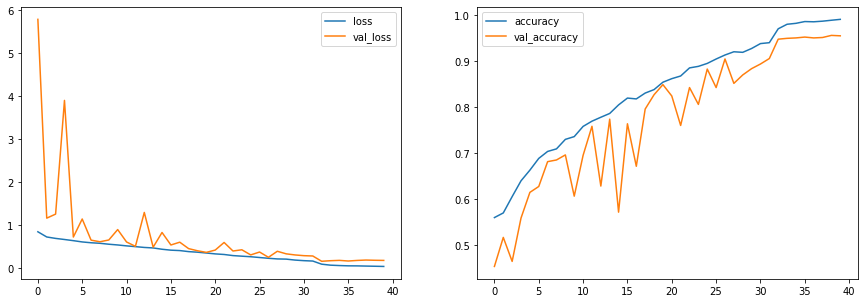

loss =  0.0269008296239502 , val_loss =  0.16755457720001526
accuracy =  0.990959 , val_accuracy =  0.9552102088928223


In [7]:
c_model_.fit(X_train_c, Y_train_c, 
            epochs = 40, 
            verbose = 1, 
            batch_size = 32, 
            validation_split = 0.1, 
            shuffle=True, 
            callbacks=callbacks)

In [8]:
c_model_.save('./models/class_c_model_p5_40.h5')

loss, acc = c_model_.evaluate(X_test, Y_test)
print("loss =", loss)
print("acc =", acc)

1216/1216 [==============================] - 2s 1ms/step
loss = 0.1796319021500255
acc = 0.9514802694320679
